0.000975895225656 0.642571737689


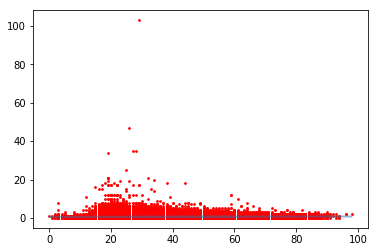

In [6]:
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/AllGunShootings.csv')

df.insert(value = [kill + inj for kill, inj in 
           zip(df['n_killed'].fillna(0), df['n_injured'].fillna(0))],
           column = 'casualties', loc = df.shape[1])

df_ages = df['participant_age'].fillna('')
df_types = df['participant_type'].fillna('')
df_casualties = df['casualties']




df_ages = [to_dict(ages) for ages in df_ages]
df_types = [to_dict(types) for types in df_types]


x_ages = []
y_casualties = []

for ages, particip_types, casualties in zip(df_ages, df_types, 
                                           df_casualties):
    for type_key in particip_types:
        if 'suspect' in particip_types[type_key].lower() and type_key in ages:
            if int(ages[type_key]) < 111: 
                x_ages.append(int(ages[type_key]))
                y_casualties.append(casualties)


X = np.vstack(x_ages)
X = np.column_stack((X, np.ones(X.shape[0])))

# Set up Y as the target price of the houses.
Y = y_casualties

a, b = np.linalg.lstsq(X, Y)[0]
print(a, b)

plt.plot(x_ages,[x*a +b for x in x_ages],lw=1.5, zorder=2, alpha = 0.5)
plt.scatter(x_ages,y_casualties,s=3,color='red', zorder=1)
plt.savefig(fname='regression_age_casualties', dpi= 300)


In [2]:
dfList = df['participant_relationship'].fillna('')

### Set string from csv to dict datastructure
def to_dict(string_dict):
    
    # set start values
    goal = {}
    val = ''
    len_string_dict = len(string_dict)
    key_switcher = True
    
    # Iterate over string indices
    for i in range(len_string_dict):
        # look for token
        if string_dict[i] == ':' and key_switcher == True:
            key_switcher = False
        # look for seperator
        elif (string_dict[i] == '|' and key_switcher == False):
            key_switcher = True
            goal[key] = val
            val = ''
        # look for key
        elif key_switcher == True and \
        not (string_dict[i] == ':' or string_dict[i] == '|'):
            key = int(string_dict[i])
        # look for value
        elif not(string_dict[i] == ':' or string_dict[i] == '|'):
            val += string_dict[i]
            
    # only add to dict if string is not empty
    if len_string_dict > 0:
        goal[key] = val
        
    return goal

In [3]:
def ordered_set(dfList):
    seen = set()
    seen_add = seen.add
    return [x for x in dfList if not (x in seen or seen_add(x))]